In [6]:
library('RODBC')
library('quantmod')
library('PerformanceAnalytics')
library('extrafont')

In [7]:
source("/usr/common/config.R")
lcon <- odbcDriverConnect(sprintf("Driver={SQL Server};Server=%s;Database=%s;Uid=%s;Pwd=%s;", ldbserver, ldbname, ldbuser, ldbpassword), case = "nochange", believeNRows = TRUE)

In [8]:
indices<-sqlQuery(lcon, "select index_name, min(time_stamp), max(time_stamp) from bhav_index group by index_name")
indices[,2]<-as.Date(indices[,2])
indices[,3]<-as.Date(indices[,3])

#print(indices)

iXts<-xts()
indexNames<-c()

##not all indices have the same start date. Make sure that the ones you select have at least 1000 days of data

for(i in 1:length(indices[,1])){
    indexName<-toString(indices[i,1])
    closingPx<-sqlQuery(lcon, sprintf("select px_close, time_stamp from bhav_index 
                                    where index_name='%s'", indexName))
    
    if(length(closingPx[,1]) < 1000)
        next
        
    iXts<-merge(iXts, dailyReturn(xts(closingPx[,1], as.Date(closingPx[,2]))))
    indexNames<-c(indexNames, indexName)
}

names(iXts)<-indexNames
#print(indexNames)

Warning message:
“closing unused RODBC handle 1”

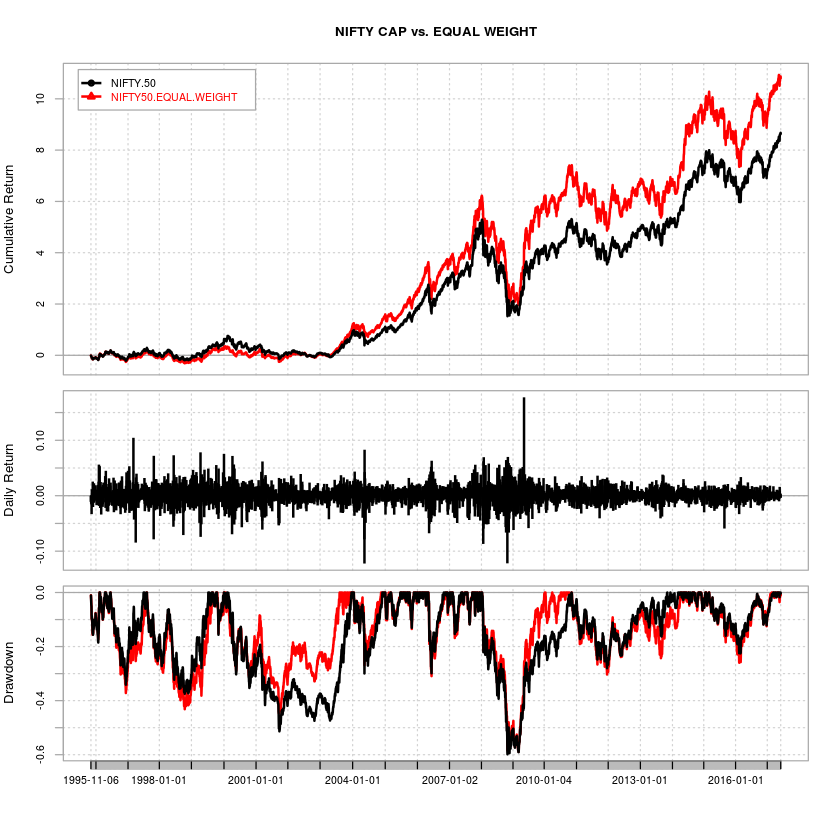

In [9]:
dailyRets<-na.omit(merge(iXts[,'NIFTY 50'], iXts[,'NIFTY50 EQUAL WEIGHT']))

charts.PerformanceSummary(dailyRets[-1,], main='NIFTY CAP vs. EQUAL WEIGHT')

In [10]:
100*Return.cumulative(dailyRets[,1])
100*Return.cumulative(dailyRets[,2])

100*Return.annualized(dailyRets[,1])
100*Return.annualized(dailyRets[,2])

,NIFTY.50
Cumulative Return,865.3464


,NIFTY50.EQUAL.WEIGHT
Cumulative Return,1080.467


,NIFTY.50
Annualized Return,11.20678


,NIFTY50.EQUAL.WEIGHT
Annualized Return,12.25986
